<a href="https://colab.research.google.com/github/mslisboa/ProjetoU9T3/blob/main/projeto_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
!pip install skimpy==0.0.7

In [ ]:
pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 114.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.18.0 requires rich>=13.7.1, but you have rich 12.6.0 which is incompatible.
skimpy 0.0.7 requires pandas<2.0.0,>=1.3.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
pip install seaborn matplotlib

In [ ]:
pip install pingouin

In [ ]:
!pip install numpy statsmodels scikit-learn


In [ ]:
!pip install --upgrade pandas scikit-learn joblib


In [ ]:
!curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/surajjha101/top-instagram-influencers-data-cleaned

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6035  100  6035    0     0  13182      0 --:--:-- --:--:-- --:--:-- 13182


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving top_insta_influencers_data.csv to top_insta_influencers_data (1).csv


# Análise exploratória e preparação dos dados

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/top_insta_influencers_data.csv')

print(dataset.head())

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


In [ ]:
from skimpy import skim

# Função para converter valores com k, m, b e % para float
def convert_to_number(value):
    if isinstance(value, str):
        if "k" in value:
            return float(value.replace("k", "")) * 1e3
        elif "m" in value:
            return float(value.replace("m", "")) * 1e6
        elif "b" in value:
            return float(value.replace("b", "")) * 1e9
        elif "%" in value:
            return float(value.replace("%", "")) / 100
    return value

columns_to_convert = ["posts", "followers", "avg_likes", "new_post_avg_like", "total_likes", "60_day_eng_rate"]

for col in columns_to_convert:
    if col in dataset.columns:
        dataset[col] = pd.to_numeric(dataset[col].apply(convert_to_number), errors='coerce')

# Análise exploratória com skimpy
print(skim(dataset))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃            ┃            ┃          ┃            ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean       ┃ sd         ┃ p0       ┃ p25        ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ rank       │  0 │    0 │        100 │         58 │        1 │         51 │        150 │       200 │ ██████ │  │
│ │ influence_ │  0 │    0 │         82 │        8.9 │       22 │         80 │         86 │        93 │     ▃█ │  │
│ │ score      │    │      │            │            │          │            │            │           │        │  │
│ │ posts      │  0 │    0 │       3500 │       3500 │       10 │        950 │       5000 │     18000 │  █▃▁▁  │  │
│ │ followers  │  0 │    0 │   77000000 │   74000000 │ 33000000 │   40000000 │   69000000 │ 480000000 │   █▁   │  │
│ │ avg_likes  │  0 │    0 │    1800000 │    2200000 │    65000 │     500000 │    2100000 │  15000000 │   █▁   │  │
│ │ 60_day_eng │  1 │  0.5 │      0.019 │      0.033 │   0.0001 │     0.0041 │       0.02 │      0.26 │   █    │  │
│ │ _rate      │    │      │            │            │          │            │            │           │        │  │
│ │ new_post_a │  0 │    0 │    1200000 │    1900000 │        0 │     200000 │    1300000 │  13000000 │  █▁▁   │  │
│ │ vg_like    │    │      │            │            │          │            │            │           │        │  │
│ │ total_like │  0 │    0 │ 3700000000 │ 5600000000 │ 18000000 │ 1000000000 │ 3900000000 │ 570000000 │   █▁   │  │
│ │ s          │    │      │            │            │          │            │            │        00 │        │  │
│ └────────────┴────┴──────┴────────────┴────────────┴──────────┴────────────┴────────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ channel_info               │      0 │          0 │                            1 │                      200 │  │
│ │ country                    │     62 │         31 │                            1 │                      200 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

None


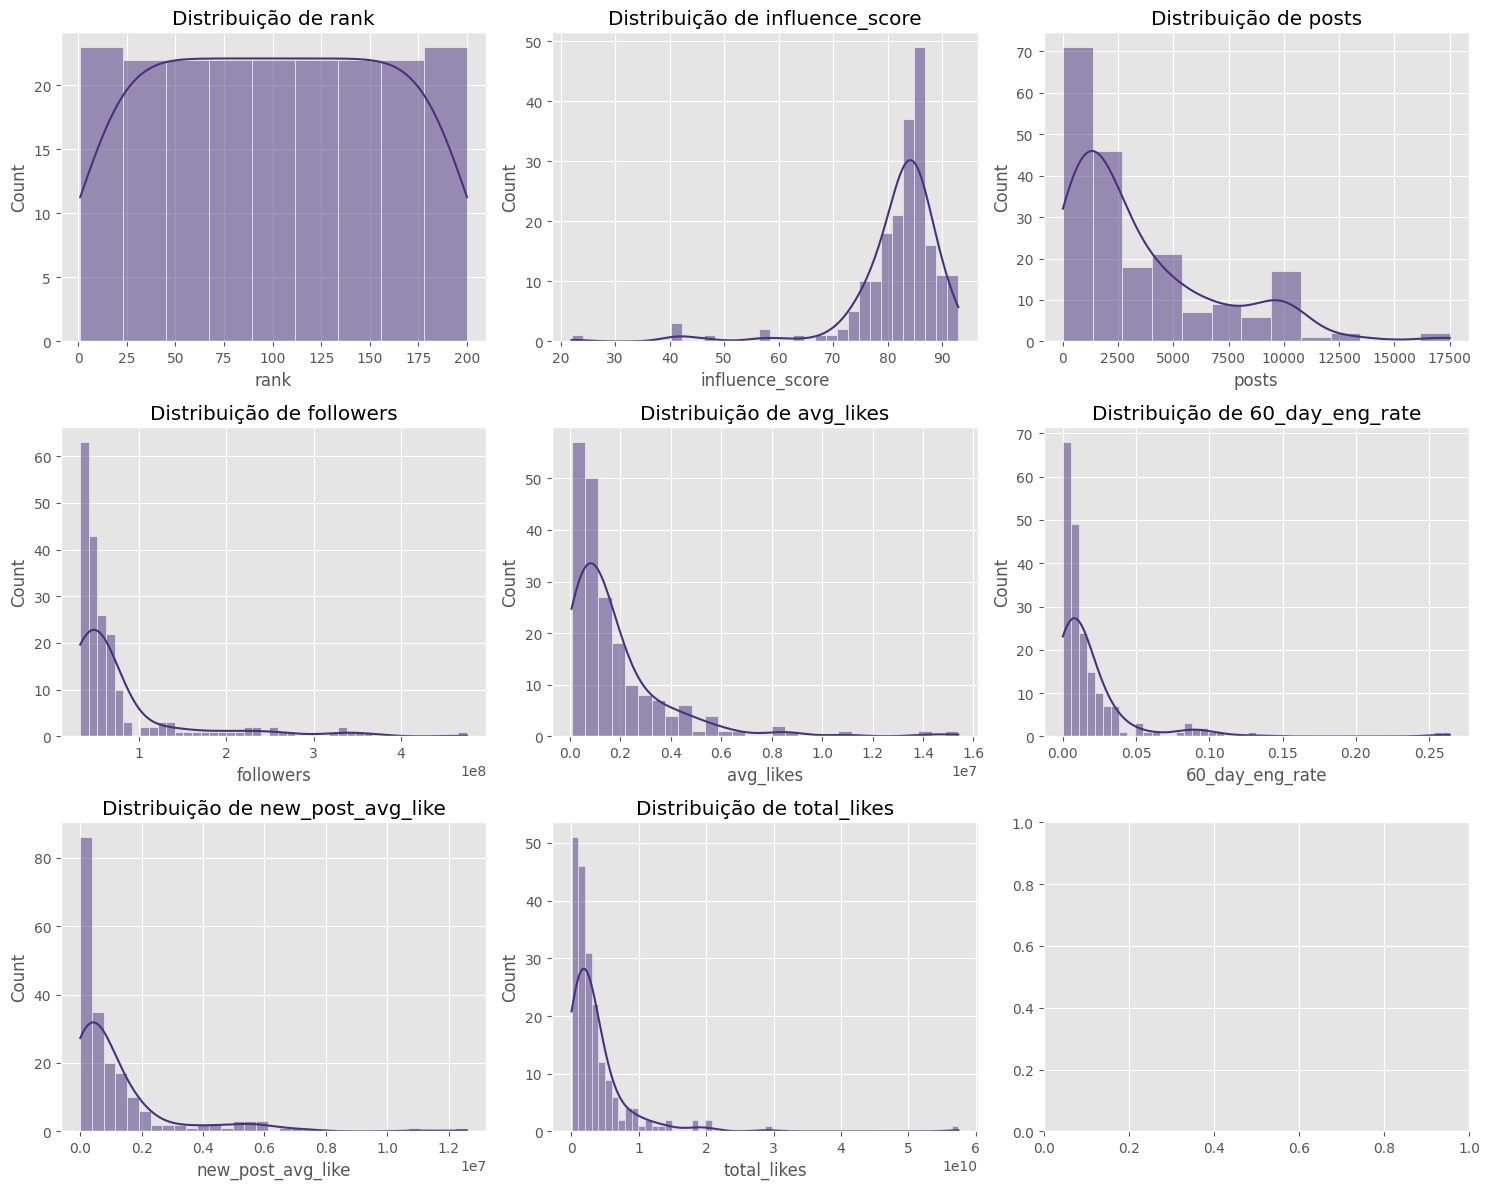

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Selecionar colunas numéricas
numeric_columns = dataset.select_dtypes(include=["float", "int"]).columns

plt.style.use('ggplot')
sns.set_palette('viridis')


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    sns.histplot(dataset[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribuição de {col}')


plt.tight_layout()
plt.show()


<ipython-input-28-f05bc64c7e6a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


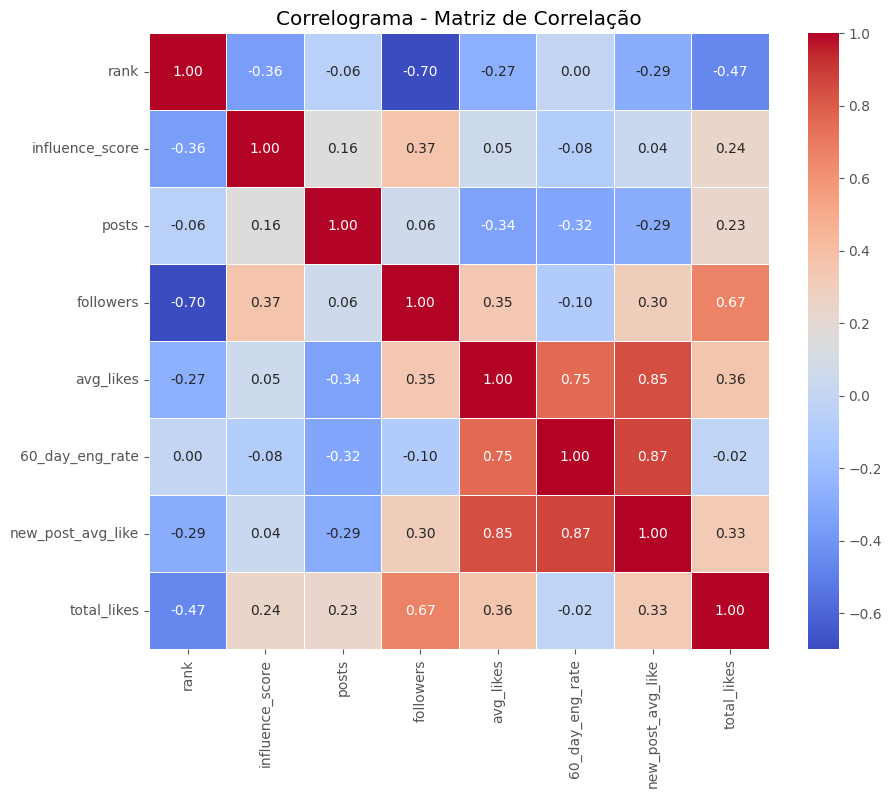

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = dataset.corr()

# Plotar correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlograma - Matriz de Correlação")
plt.show()


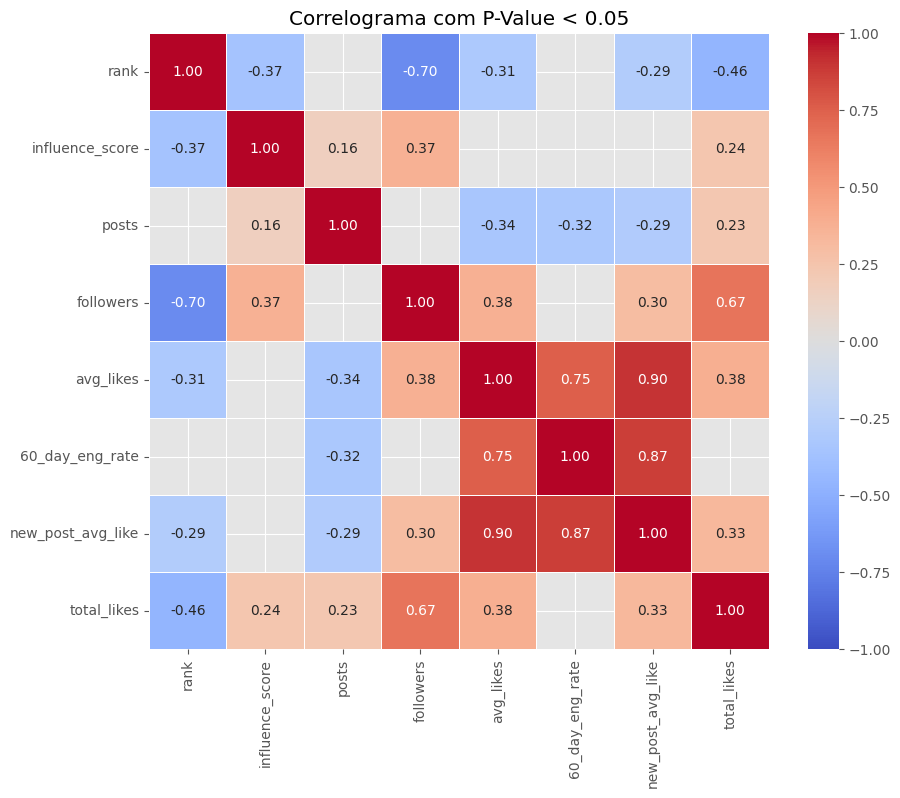

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Função para calcular matriz de correlação e p-valores
def correlation_with_pvalues(data):
    numeric_cols = data.select_dtypes(include=["float", "int"])

    # Tratar NaNs e infs (remover linhas com valores inválidos)
    numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

    cols = numeric_cols.columns
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for col1 in cols:
        for col2 in cols:
            corr, pval = pearsonr(numeric_cols[col1], numeric_cols[col2])
            corr_matrix.loc[col1, col2] = corr
            pval_matrix.loc[col1, col2] = pval

    return corr_matrix, pval_matrix

# Calcular matriz de correlação e p-valores
correlation_matrix, pvalue_matrix = correlation_with_pvalues(dataset)

# Aplicar máscara para p-valores > 0.05 (não significativos)
mask = pvalue_matrix > 0.05
filtered_corr_matrix = correlation_matrix.mask(mask)

# Plotar o correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Correlograma com P-Value < 0.05")
plt.show()


# Modelo de Regressão Lienar

In [ ]:
# Selecionar apenas colunas numéricas
numeric_dataset = dataset.select_dtypes(include=np.number)

# Remover linhas com valores nulos
numeric_dataset = numeric_dataset.dropna()

print(numeric_dataset.head())

   rank  influence_score   posts    followers  avg_likes  60_day_eng_rate  \
0     1               92  3300.0  475800000.0  8700000.0           0.0139   
1     2               91  6900.0  366200000.0  8300000.0           0.0162   
3     4               93  1800.0  342700000.0  6200000.0           0.0097   
4     5               91  6800.0  334100000.0  1900000.0           0.0020   
5     6               91  5600.0  329200000.0  3500000.0           0.0088   

   new_post_avg_like   total_likes  
0          6500000.0  2.900000e+10  
1          5900000.0  5.740000e+10  
3          3300000.0  1.150000e+10  
4           665300.0  1.250000e+10  
5          2900000.0  1.990000e+10  


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

independent_vars = ['followers', 'total_likes', 'avg_likes']
X = numeric_dataset[independent_vars]

X = add_constant(X)

# Calcular VIF
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Variable       VIF
0        const  2.344230
1    followers  2.088063
2  total_likes  2.360971
3    avg_likes  1.948804


Como nenhum VIF foi >= a 5 podemos usar essas variáveis como indepedentes no nosso modelo.

In [ ]:
from sklearn.model_selection import train_test_split

# Definir variável dependente e independentes
dependent_var = 'rank'
X = dataset[independent_vars]
y = dataset[dependent_var]

# Dividir os dados em treino (60%) e teste (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Treinamento: {X_train.shape}, Teste: {X_test.shape}")


Treinamento: (82, 3), Teste: (56, 3)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir modelo de regressão
ridge = Ridge()

# Grid de hiperparâmetros
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularização
}

X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)


# Ajuste de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print(f"Melhor hiperparâmetro: {grid_search.best_params_}")

Melhor hiperparâmetro: {'alpha': 100.0}


In [ ]:
from sklearn.linear_model import Ridge

final_model = Ridge(alpha=100.0)
final_model.fit(X_train, y_train)

# Coeficientes do modelo
print("Coeficientes do modelo:", final_model.coef_)
print("Intercepto do modelo:", final_model.intercept_)

Coeficientes do modelo: [-5.34325385e-07  8.43350773e-10 -3.52838731e-06]
Intercepto do modelo: 143.1897615378708


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Previsões no conjunto de teste
y_pred = final_model.predict(X_test)

# Métricas de avaliação
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² no teste: {r2}")
print(f"RMSE no teste: {rmse}")
print(f"MAE no teste: {mae}")


R² no teste: 0.45142682357616437
RMSE no teste: 44.91019559375112
MAE no teste: 38.22374073010734


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treine o modelo novamente com os dados escalados
final_model_scaled = Ridge(alpha=100.0)
final_model_scaled.fit(X_train_scaled, y_train)

# Avaliar novamente no conjunto de teste
y_pred_scaled = final_model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

print(f"R² escalado: {r2_scaled}")
print(f"RMSE escalado: {rmse_scaled}")
print(f"MAE escalado: {mae_scaled}")
print("Coeficientes escalados:", final_model_scaled.coef_)

R² escalado: 0.35101015674903124
RMSE escalado: 48.84798038016513
MAE escalado: 42.66854172649575
Coeficientes escalados: [-15.34946287  -5.40136452  -7.09720138]


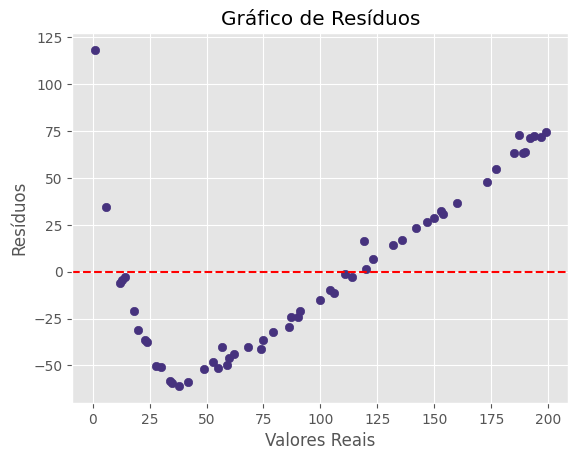

In [ ]:
import matplotlib.pyplot as plt

# Resíduos
residuals = y_test - y_pred

# Plot dos resíduos
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()